<a href="https://colab.research.google.com/github/byambaa1982/CodingWorkshops/blob/master/event_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('/billieconcert.csv')

In [9]:
data.shape

(910, 9)

In [10]:
data.head()

,Event,Venue,Event date,Zone,Section,Price,Row,Qty,Date sold
0,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,B Center,617.81,S,4,2019/02/05 10:09:33
1,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve C Sides,345.77,V,2,2019/02/05 09:30:39
2,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve A Center,459.87,Q,3,2019/02/07 21:45:23
3,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve B Center,218.29,K,2,2019/02/07 21:29:08
4,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Benches,114.75,C,2,2019/02/07 20:31:02


In [0]:
df =data[4:]

In [0]:
df=data[['Section', 'Price', 'Date sold']]

In [21]:
df.head()

,Section,Price,Date sold
0,B Center,617.81,2019/02/05 10:09:33
1,Reserve C Sides,345.77,2019/02/05 09:30:39
2,Reserve A Center,459.87,2019/02/07 21:45:23
3,Reserve B Center,218.29,2019/02/07 21:29:08
4,Benches,114.75,2019/02/07 20:31:02


In [25]:
df['Date sold'][0]

'2019/02/05 10:09:33'

In [0]:
x=df['Date sold'][0].split(" ")

In [32]:
x

['2019/02/05', '10:09:33']

In [34]:
x[0]

'2019/02/05'

In [36]:
	df['splitted']=df[df.columns[2]].map(lambda x:x.split(' '))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df.head()

,Section,Price,Date sold,splitted,date,time
0,B Center,617.81,2019/02/05 10:09:33,"[2019/02/05, 10:09:33]",2019/02/05,10:09:33
1,Reserve C Sides,345.77,2019/02/05 09:30:39,"[2019/02/05, 09:30:39]",2019/02/05,09:30:39
2,Reserve A Center,459.87,2019/02/07 21:45:23,"[2019/02/07, 21:45:23]",2019/02/07,21:45:23
3,Reserve B Center,218.29,2019/02/07 21:29:08,"[2019/02/07, 21:29:08]",2019/02/07,21:29:08
4,Benches,114.75,2019/02/07 20:31:02,"[2019/02/07, 20:31:02]",2019/02/07,20:31:02


In [42]:
df['date']=df['splitted'].map(lambda x:x[0])
df['time']=df['splitted'].map(lambda x:x[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df.date[0]

'2019/02/05'

In [0]:
df1=df.groupby(['date']).sum()

In [73]:
df1.head()

,Price
date,
2019/02/05,1741.58
2019/02/07,15531.76
2019/02/08,37978.45
2019/02/09,7495.97
2019/02/10,1583.55


In [77]:
df1.describe()

,Price
count,146.000000
mean,1932.338562
std,3631.788707
min,133.700000
25%,685.240000
50%,1202.915000
75%,1967.070000
max,37978.450000


In [0]:
df2=df.groupby(['date']).sum()

No handles with labels found to put in legend.


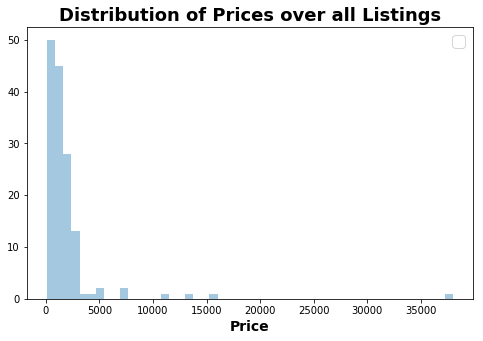

In [59]:
# look at price distribution# look a 
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.distplot(df1.Price,kde=False)
plt.xlabel('Price',fontsize=14,fontweight="bold")

plt.title('Distribution of Prices over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.show()

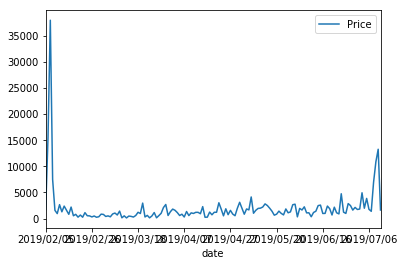

In [60]:
df1.plot()

In [63]:
len(df.date.unique())

146

In [0]:
df1 = df1.reset_index()
res = df.groupby(df.index // 10).agg('Price')

In [69]:
res

In [71]:
df1.columns

Index(['level_0', 'index', 'date', 'Price'], dtype='object')

In [74]:
# How many conversion are there for each day?
df['date'].value_counts()

2019/02/08    214
2019/02/07     65
2019/02/09     36
2019/07/10     29
2019/03/20     21
2019/07/09     15
2019/07/08     11
2019/03/30     10
2019/02/17     10
2019/02/10     10
2019/02/12     10
2019/02/14      9
2019/06/24      9
2019/07/03      8
2019/03/29      8
2019/02/13      8
2019/04/15      8
2019/02/15      7
2019/05/14      7
2019/03/10      7
2019/06/27      6
2019/04/22      6
2019/04/25      6
2019/02/11      6
2019/03/25      6
2019/06/28      5
2019/07/04      5
2019/03/19      5
2019/06/18      5
2019/07/05      5
             ... 
2019/04/20      2
2019/05/11      2
2019/05/12      2
2019/05/03      2
2019/04/26      2
2019/03/21      2
2019/05/04      2
2019/06/23      2
2019/05/19      2
2019/06/22      2
2019/02/22      2
2019/02/20      2
2019/03/24      2
2019/06/26      2
2019/02/26      2
2019/04/07      2
2019/03/11      1
2019/06/17      1
2019/03/16      1
2019/05/20      1
2019/06/02      1
2019/04/28      1
2019/04/16      1
2019/06/08      1
2019/03/23

In [80]:
df1

,Price
date,
2019/02/05,1741.58
2019/02/07,15531.76
2019/02/08,37978.45
2019/02/09,7495.97
2019/02/10,1583.55
2019/02/11,961.62
2019/02/12,2670.50
2019/02/13,1303.44
2019/02/14,2393.70


In [0]:
df2=df1.groupby(np.arange(len(df1))//7).sum()

In [85]:
df2

,Price
0,67963.43
1,9690.01
2,3773.78
3,3716.94
4,5117.48
5,4131.70
6,5885.41
7,10152.82
8,6434.28
9,7986.69


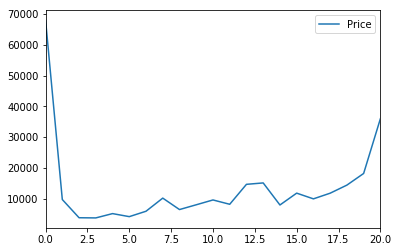

In [86]:
df2.plot()

In [0]:
section=df.groupby(['Section']).sum()

In [90]:
section

,Price
Section,
A,672.37
A CENTER,663.41
A Center,375.00
AL,447.40
B Center,1116.81
BL,498.96
Bench Left,621.97
Bench Right,953.55
Benches,10110.10


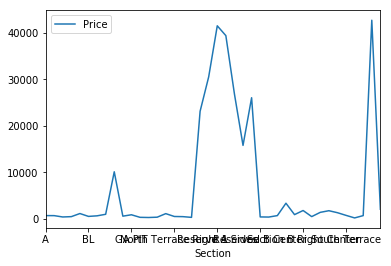

In [93]:
section.plot()